***

# **Analiza podatkov podcasta DTFH**

***


## Uvod

Duncan Trussell Family Hour (DTFH skrajšano) je podcast ameriškega avtorja Duncana Trussella, ki se ne preveč resno ukvarja s tematikami moderne duhovnosti. Gostje posameznih epizod so lahko vse od novinarjev, komediantov in glasbenikov do budističnih gurujev, psihoterapevtov ter izvajalcev poganskih spiritualnih obredov. Posamezna epizoda običajno poteka kot prost pogovor med Duncanom in njegovim gostom (ali gosti, v primeru ko se mu v eter pridruži več kot ena oseba). Pogoste tematike obsegajo življenske anekdote, mnenja o spiritualnosti, raznorazne pogovore o meditaciji ter uporabo halucinogenih psihoaktivnih substanc v namen spoznavanja sebe in sveta okoli nas.

V tem dokumentu bom analiziral nekatere podatke, ki sem jih zajel iz avtorjeve spletne strani ([DTFH](http://www.duncantrussell.com/episodes)). Začnimo najprej s potrebnim uvozom python paketa pandas, s katerim bom analizo izvajal, ter dokumenta DTFH.csv, v katerem so zbrani podatki posameznih epizod, potem pa si oglejmo kako izgledajo naši surovi podatki:

In [466]:
# Importanje pandas in dsv datoteke
import pandas as pd
podcasti = pd.read_csv('C:/faks/programiranje 1/DTFH-analiza-podatkov/DTFH.csv')
pd.options.display.max_rows = 20

In [467]:
# Ogled surovih podatkov
podcasti

,naslov,povezava,dolzina,datum,eksplicitnost,opis
0,Erin Trussell,https://audioboom.com/posts/8026230,4959,"Sat, 05 Feb 2022 02:20:29",no,"Erin Trussell, cult-mommy and Duncan's intima..."
1,David Nichtern,https://audioboom.com/posts/8021385,5866,"Sat, 29 Jan 2022 03:56:56",no,"David Nichtern, Senior Buddhist teacher at Dh..."
2,David Chernikoff,https://audioboom.com/posts/8017010,6609,"Fri, 21 Jan 2022 17:06:58",no,"David Chernikoff, spiritual teacher and autho..."
3,Andrew Yang,https://audioboom.com/posts/8013368,4807,"Sat, 15 Jan 2022 03:35:02",no,"Andrew Yang, brilliant human and presidential..."
4,Nikki Walton,https://audioboom.com/posts/8009414,4909,"Sat, 08 Jan 2022 02:05:22",no,"Nikki Walton, best-selling author and NAACP a..."
...,...,...,...,...,...,...
395,Derrick Beckles is a HOT PACKAGE,https://audioboom.com/posts/6794027,6737,"Tue, 03 Dec 2013 03:00:46",no,"Derrick Beckles (TV carnage, Eric Andre Show, ..."
396,Erin McGathy confronts the darklord,https://audioboom.com/posts/6794028,7947,"Tue, 26 Nov 2013 21:52:56",no,"Erin McGathy (host of the amazing ""This Feels ..."
397,DUSTIN MARSHALL,https://audioboom.com/posts/6794029,7523,"Wed, 20 Nov 2013 22:30:49",no,The brilliant lord of podcasts and father of F...
398,DAN HARMON!!!!!,https://audioboom.com/posts/6794030,6296,"Mon, 11 Nov 2013 22:34:41",no,"Dan Harmon (Community, Harmontown) returns to ..."


## Trendi objavitev in trajanja epizod

### Povprečno trajanje epizode

Začnimo z izračunom povprečne dolžine epizode podcasta. Ker je v csv datoteki dolžina napisana v sekundah (saj je to format, v katerem je zapisana na itunesih) definirajmo še pomožno funkcijo, ki nam bo to dolžino zapisala v bolj predstavljivi obliki (ure, minute, sekunde).

In [468]:
# Pomožna funkcija ter dodajanje novega stolpca v tabelo.
def sekunde_v_ure(n):
    h = (n // 3600)
    min = ((n // 60) - h * 60)
    sec = (n - 60 * min - 3600 * h)
    return (h, min, sec)

podcasti['dolzina_h'] = (podcasti.dolzina).apply(sekunde_v_ure)
podcasti

,naslov,povezava,dolzina,datum,eksplicitnost,opis,dolzina_h
0,Erin Trussell,https://audioboom.com/posts/8026230,4959,"Sat, 05 Feb 2022 02:20:29",no,"Erin Trussell, cult-mommy and Duncan's intima...","(1, 22, 39)"
1,David Nichtern,https://audioboom.com/posts/8021385,5866,"Sat, 29 Jan 2022 03:56:56",no,"David Nichtern, Senior Buddhist teacher at Dh...","(1, 37, 46)"
2,David Chernikoff,https://audioboom.com/posts/8017010,6609,"Fri, 21 Jan 2022 17:06:58",no,"David Chernikoff, spiritual teacher and autho...","(1, 50, 9)"
3,Andrew Yang,https://audioboom.com/posts/8013368,4807,"Sat, 15 Jan 2022 03:35:02",no,"Andrew Yang, brilliant human and presidential...","(1, 20, 7)"
4,Nikki Walton,https://audioboom.com/posts/8009414,4909,"Sat, 08 Jan 2022 02:05:22",no,"Nikki Walton, best-selling author and NAACP a...","(1, 21, 49)"
...,...,...,...,...,...,...,...
395,Derrick Beckles is a HOT PACKAGE,https://audioboom.com/posts/6794027,6737,"Tue, 03 Dec 2013 03:00:46",no,"Derrick Beckles (TV carnage, Eric Andre Show, ...","(1, 52, 17)"
396,Erin McGathy confronts the darklord,https://audioboom.com/posts/6794028,7947,"Tue, 26 Nov 2013 21:52:56",no,"Erin McGathy (host of the amazing ""This Feels ...","(2, 12, 27)"
397,DUSTIN MARSHALL,https://audioboom.com/posts/6794029,7523,"Wed, 20 Nov 2013 22:30:49",no,The brilliant lord of podcasts and father of F...,"(2, 5, 23)"
398,DAN HARMON!!!!!,https://audioboom.com/posts/6794030,6296,"Mon, 11 Nov 2013 22:34:41",no,"Dan Harmon (Community, Harmontown) returns to ...","(1, 44, 56)"


In [469]:
# Izračun povprečja dolžine
pov_dolzina = round((podcasti.dolzina).mean())
print(sekunde_v_ure(pov_dolzina))

(1, 34, 10)


Povprečna dolžina epizode je torej 1h 34min.

### Razporeditev epizod glede na dolžino

Poglejmo si še koliko epizod je krajših od ene ure, koliko jih je med eno in dvema urama ter koliko jih je daljših od dveh ur.

In [470]:
#Vse epizode razvrščene po dolžini
rezina_dolzin = (podcasti[['naslov', 'dolzina']]).copy()
rezina_dolzin['dolzina_h'] = (podcasti.dolzina).apply(sekunde_v_ure)
rezina_dolzin.sort_values('dolzina')

,naslov,dolzina,dolzina_h
60,Introducing Dark Air With Terry Carnation,852,"(0, 14, 12)"
96,Raghu Markus,2492,"(0, 41, 32)"
264,David Nichtern,2570,"(0, 42, 50)"
20,"The Leather Rose, Episode 1",2901,"(0, 48, 21)"
300,LAMA SURYA DAS,3324,"(0, 55, 24)"
...,...,...,...
236,Aubrey Marcus LIVE from the Brooklyn Bell House,9614,"(2, 40, 14)"
98,Shane Mauss,9626,"(2, 40, 26)"
393,BRODY STEVENS,9646,"(2, 40, 46)"
76,Shane Mauss,10600,"(2, 56, 40)"


In [471]:
#Epizode krajše od 1 ure
rezina_dolzin_kratke = rezina_dolzin[rezina_dolzin.dolzina < 3600]
rezina_dolzin_kratke.sort_values('dolzina')

,naslov,dolzina,dolzina_h
60,Introducing Dark Air With Terry Carnation,852,"(0, 14, 12)"
96,Raghu Markus,2492,"(0, 41, 32)"
264,David Nichtern,2570,"(0, 42, 50)"
20,"The Leather Rose, Episode 1",2901,"(0, 48, 21)"
300,LAMA SURYA DAS,3324,"(0, 55, 24)"
334,JOAN HALIFAX and RAGHU MARKUS,3524,"(0, 58, 44)"
221,Wayne Coyne,3541,"(0, 59, 1)"


In [472]:
#Epizode med 1 in 2 urama
rezina_dolzin_pov = (rezina_dolzin[(rezina_dolzin.dolzina >= 3600) & (rezina_dolzin.dolzina < 7200)])
rezina_dolzin_pov.sort_values('dolzina')

,naslov,dolzina,dolzina_h
359,JACK KORNFIELD,3614,"(1, 0, 14)"
351,Krishna Das,3645,"(1, 0, 45)"
284,George Noory is THE NIGHTHAWK,3678,"(1, 1, 18)"
322,Dr. Drew And Fred Stoller,3704,"(1, 1, 44)"
160,David Nichtern,3734,"(1, 2, 14)"
...,...,...,...
140,Emil Amos,7048,"(1, 57, 28)"
392,LANCE BANGS!,7064,"(1, 57, 44)"
354,BERT KREISCHER,7067,"(1, 57, 47)"
47,Jason Louv,7159,"(1, 59, 19)"


In [473]:
#Epizode daljše od 2 ur
rezina_dolzin_dolge = rezina_dolzin[rezina_dolzin.dolzina >= 7200]
rezina_dolzin_dolge.sort_values('dolzina')

,naslov,dolzina,dolzina_h
204,Karen Kilgariff,7200,"(2, 0, 0)"
312,Kevin Johnson,7246,"(2, 0, 46)"
137,Rob Schrab,7246,"(2, 0, 46)"
211,Natasha Leggero and Riki Lindhome,7260,"(2, 1, 0)"
127,Susan Marrufo,7282,"(2, 1, 22)"
...,...,...,...
236,Aubrey Marcus LIVE from the Brooklyn Bell House,9614,"(2, 40, 14)"
98,Shane Mauss,9626,"(2, 40, 26)"
393,BRODY STEVENS,9646,"(2, 40, 46)"
76,Shane Mauss,10600,"(2, 56, 40)"


In [474]:
#Preštete zgornje skupine epizod
st_kratkih = len(rezina_dolzin_kratke.index)
st_pov = len(rezina_dolzin_pov.index)
st_dolgih = len(rezina_dolzin_dolge.index)
print(st_kratkih, st_pov, st_dolgih)

7 336 57


Krajših od ene ure je torej le 7 epizod, daljših od dveh ur pa 57, s tem, da je najdaljša dolga več kot tri ure. Velika večina epizod (336) pa je dolgih nekaj med eno in dvema urama.



### Število epizod po mesecih in letih

Poglejmo si kdaj so bile epizode objavljene. V prvotni tabeli so časi objave napisani do dneva in celo ure natačno. Relevanten podatek bo kvečjemu katerega meseca in katerega leta je izšla epizoda, zatorej oblikujmo najprej funkciji, ki nam podata mesec in leto objave.

In [475]:
#Definicija pomožne funkcije za mesece ter dodajanje stolpca 
def pretvori_v_mesece(str):
    return str[7:-8]

podcasti['mesec'] = (podcasti.datum).apply(pretvori_v_mesece)
podcasti

,naslov,povezava,dolzina,datum,eksplicitnost,opis,dolzina_h,mesec
0,Erin Trussell,https://audioboom.com/posts/8026230,4959,"Sat, 05 Feb 2022 02:20:29",no,"Erin Trussell, cult-mommy and Duncan's intima...","(1, 22, 39)",Feb 2022
1,David Nichtern,https://audioboom.com/posts/8021385,5866,"Sat, 29 Jan 2022 03:56:56",no,"David Nichtern, Senior Buddhist teacher at Dh...","(1, 37, 46)",Jan 2022
2,David Chernikoff,https://audioboom.com/posts/8017010,6609,"Fri, 21 Jan 2022 17:06:58",no,"David Chernikoff, spiritual teacher and autho...","(1, 50, 9)",Jan 2022
3,Andrew Yang,https://audioboom.com/posts/8013368,4807,"Sat, 15 Jan 2022 03:35:02",no,"Andrew Yang, brilliant human and presidential...","(1, 20, 7)",Jan 2022
4,Nikki Walton,https://audioboom.com/posts/8009414,4909,"Sat, 08 Jan 2022 02:05:22",no,"Nikki Walton, best-selling author and NAACP a...","(1, 21, 49)",Jan 2022
...,...,...,...,...,...,...,...,...
395,Derrick Beckles is a HOT PACKAGE,https://audioboom.com/posts/6794027,6737,"Tue, 03 Dec 2013 03:00:46",no,"Derrick Beckles (TV carnage, Eric Andre Show, ...","(1, 52, 17)",Dec 2013
396,Erin McGathy confronts the darklord,https://audioboom.com/posts/6794028,7947,"Tue, 26 Nov 2013 21:52:56",no,"Erin McGathy (host of the amazing ""This Feels ...","(2, 12, 27)",Nov 2013
397,DUSTIN MARSHALL,https://audioboom.com/posts/6794029,7523,"Wed, 20 Nov 2013 22:30:49",no,The brilliant lord of podcasts and father of F...,"(2, 5, 23)",Nov 2013
398,DAN HARMON!!!!!,https://audioboom.com/posts/6794030,6296,"Mon, 11 Nov 2013 22:34:41",no,"Dan Harmon (Community, Harmontown) returns to ...","(1, 44, 56)",Nov 2013


In [476]:
#Definicija pomožne funkcije za leto ter dodajanje stolpca
def pretvori_v_leta(str):
    return str[4:]

podcasti['leto'] = (podcasti.mesec).apply(pretvori_v_leta)
podcasti


,naslov,povezava,dolzina,datum,eksplicitnost,opis,dolzina_h,mesec,leto
0,Erin Trussell,https://audioboom.com/posts/8026230,4959,"Sat, 05 Feb 2022 02:20:29",no,"Erin Trussell, cult-mommy and Duncan's intima...","(1, 22, 39)",Feb 2022,2022
1,David Nichtern,https://audioboom.com/posts/8021385,5866,"Sat, 29 Jan 2022 03:56:56",no,"David Nichtern, Senior Buddhist teacher at Dh...","(1, 37, 46)",Jan 2022,2022
2,David Chernikoff,https://audioboom.com/posts/8017010,6609,"Fri, 21 Jan 2022 17:06:58",no,"David Chernikoff, spiritual teacher and autho...","(1, 50, 9)",Jan 2022,2022
3,Andrew Yang,https://audioboom.com/posts/8013368,4807,"Sat, 15 Jan 2022 03:35:02",no,"Andrew Yang, brilliant human and presidential...","(1, 20, 7)",Jan 2022,2022
4,Nikki Walton,https://audioboom.com/posts/8009414,4909,"Sat, 08 Jan 2022 02:05:22",no,"Nikki Walton, best-selling author and NAACP a...","(1, 21, 49)",Jan 2022,2022
...,...,...,...,...,...,...,...,...,...
395,Derrick Beckles is a HOT PACKAGE,https://audioboom.com/posts/6794027,6737,"Tue, 03 Dec 2013 03:00:46",no,"Derrick Beckles (TV carnage, Eric Andre Show, ...","(1, 52, 17)",Dec 2013,2013
396,Erin McGathy confronts the darklord,https://audioboom.com/posts/6794028,7947,"Tue, 26 Nov 2013 21:52:56",no,"Erin McGathy (host of the amazing ""This Feels ...","(2, 12, 27)",Nov 2013,2013
397,DUSTIN MARSHALL,https://audioboom.com/posts/6794029,7523,"Wed, 20 Nov 2013 22:30:49",no,The brilliant lord of podcasts and father of F...,"(2, 5, 23)",Nov 2013,2013
398,DAN HARMON!!!!!,https://audioboom.com/posts/6794030,6296,"Mon, 11 Nov 2013 22:34:41",no,"Dan Harmon (Community, Harmontown) returns to ...","(1, 44, 56)",Nov 2013,2013


Oglejmo si sedaj graf, koliko epizod je bilo objavljenih v posameznem letu.

<AxesSubplot:xlabel='leto'>

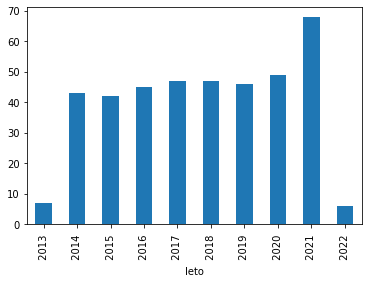

In [477]:
#Graf epizod po letih
%matplotlib inline
podcasti_leta = podcasti.groupby('leto').size()
graf_epizode_po_letih = podcasti_leta.plot.bar()
graf_epizode_po_letih

Kot vidimo izide v povprečnem letu nekaj več kot 40 epizod. Podatki za leti 2013 in 2022 so nepopolni (večina epizod iz leta 2013 manjka, leto 2022 pa se je ravnokar začelo). Izjema je leto 2021 ko je izšlo skoraj 70 epizod. Morda je vzrok za to Covid 19. To hipotezo lahko podpremo/ovržemo z analizo izdanih epizod po mesecih, kjer se bo jasneje vidilo kdaj se je število izdanih epizod začelo večati.

<AxesSubplot:xlabel='mesec'>

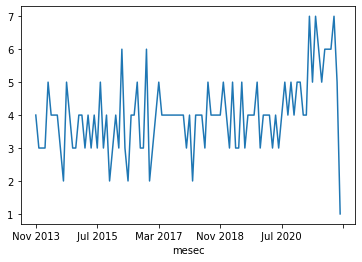

In [478]:
%matplotlib inline
podcasti_meseci = (podcasti[::-1]).groupby('mesec', sort= False).size()
graf_epizode_po_mesecih = podcasti_meseci.plot()
graf_epizode_po_mesecih

Kot vidimo noben mesec ne izstopa posebaj. Omembe vredno je da ni bilo meseca v zadnjih osmih letih, v katerem nista bili izdani vsaj dve epizodi podcasta. Število epizod se je začelo večati drugo polovico leta 2020 in potem ostalo visoko celo leto 2021.

### Spreminjanje trajanja epizod skozi leta

Zadnja stvari, ki si jo bomo ogledali je kako se je spreminjala povprečna dolžina epizod skozi leta obstoja podcasta. Po občutki bi predvideval, da se epizode v povprečju daljšajo.

<AxesSubplot:xlabel='leto'>

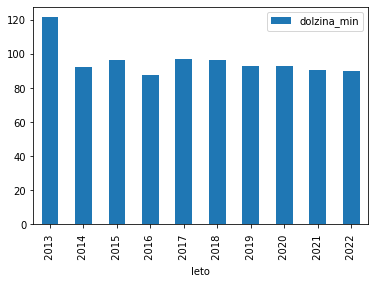

In [479]:
# Graf povprečne dolžine v minutah glede na leto
rezina_dolzin_po_letih = (podcasti[['leto']]).copy()
rezina_dolzin_po_letih['dolzina_min'] = (podcasti.dolzina // 60)
graf_dolzine_po_letih = (rezina_dolzin_po_letih.groupby('leto').mean()).plot.bar()
graf_dolzine_po_letih

Kot kaže je bila moja prvotna hipoteza napačna. Dolžina epizod se skozi leta ni bistveno spreminjala. Edino leto, ki po dolžini izstopa je leto 2013, vendar je velikost vzorca iz tega leta relatovno majhna (< 10 v primerjavi z običajnimi 40), zaradi česar ne moremo avtomatično predvidevati, da so v povprečju epizode it leta 2013 daljše.

## Analiza gostov

Želja v tem razdelku je, da bi vsaj približno lahko ugotovili kolikokrat se pojavijo določeni gostje v podcastih. Ker so vsi gostje vedno (oz. skoraj vedno) našteti v naslovu same epizode, bomo zato analizirali naslove posameznih epizod. Sestavimo najprej nekaj funkcij, ki nam bodo pri tem pomagale:

In [480]:
# Funkcija ki iz nekega stavka vrne seznam besed
def naredi_seznam_besed(tekst):
    return tekst.split()

In [481]:
# Funkcija ki prešteje število ponovitev besede v seznamu in zapiše ta podatek v slovar
def prestej_besede(seznam):
    slovar = {}
    for beseda in seznam:
        slovar.update({beseda: seznam.count(beseda)})
    return slovar

In [482]:
#Oglejmo si sedaj samo relevantne stolpce
rezina_podcasti_gostje = (podcasti[['naslov']]).copy()
rezina_podcasti_gostje['seznam_besed_naslov'] = (podcasti.naslov).apply(naredi_seznam_besed)
rezina_podcasti_gostje

,naslov,seznam_besed_naslov
0,Erin Trussell,"[Erin, Trussell]"
1,David Nichtern,"[David, Nichtern]"
2,David Chernikoff,"[David, Chernikoff]"
3,Andrew Yang,"[Andrew, Yang]"
4,Nikki Walton,"[Nikki, Walton]"
...,...,...
395,Derrick Beckles is a HOT PACKAGE,"[Derrick, Beckles, is, a, HOT, PACKAGE]"
396,Erin McGathy confronts the darklord,"[Erin, McGathy, confronts, the, darklord]"
397,DUSTIN MARSHALL,"[DUSTIN, MARSHALL]"
398,DAN HARMON!!!!!,"[DAN, HARMON!!!!!]"


In [483]:
# Naredimo tabelo vseh besed v naslovih epizod padajoče glede na ponovitve (gledamo 20 najbolj pogostih)
seznam_vseh_besed_naslov = []

for seznam in rezina_podcasti_gostje.seznam_besed_naslov:
    for beseda in seznam:
        seznam_vseh_besed_naslov.append(beseda)

slovar_besed = prestej_besede(seznam_vseh_besed_naslov)

pomozni_slovar = {'beseda' : slovar_besed.keys(), 'ponovitve' : (slovar_besed.values())}

ponovitve_besed_naslov = pd.DataFrame(pomozni_slovar)
ponovitve_besed_naslov.sort_values('ponovitve', ascending= False).head(20)

,beseda,ponovitve
2,David,19
27,and,16
22,with,16
63,Raghu,15
3,Nichtern,14
64,Markus,14
34,Marcus,11
25,Johnny,10
115,Shane,10
23,Aubrey,10


Opazimo da je najbolj pogosta beseda v naslovih ime "David", vendar, ker je pogosto ime, gre najbrž za več različnih Davidov. In res, če pogledamo:

In [484]:
def david_in(seznam):
    return 'David' in seznam

rezina_podcasti_gostje['besede_naslov_str'] = rezina_podcasti_gostje.seznam_besed_naslov.apply(str)
rezina_podcasti_gostje['david'] = rezina_podcasti_gostje.besede_naslov_str.apply(david_in)
rezina_podcasti_gostje[rezina_podcasti_gostje.david == True]

,naslov,seznam_besed_naslov,besede_naslov_str,david
1,David Nichtern,"[David, Nichtern]","['David', 'Nichtern']",True
2,David Chernikoff,"[David, Chernikoff]","['David', 'Chernikoff']",True
27,David Nichtern,"[David, Nichtern]","['David', 'Nichtern']",True
34,David Nichtern,"[David, Nichtern]","['David', 'Nichtern']",True
53,David Nichtern,"[David, Nichtern]","['David', 'Nichtern']",True
65,David Sauvage,"[David, Sauvage]","['David', 'Sauvage']",True
69,David Stuart MacLean,"[David, Stuart, MacLean]","['David', 'Stuart', 'MacLean']",True
72,David Nichtern,"[David, Nichtern]","['David', 'Nichtern']",True
100,UNLOCKED Crowdcast with David Nichtern,"[UNLOCKED, Crowdcast, with, David, Nichtern]","['UNLOCKED', 'Crowdcast', 'with', 'David', 'Ni...",True
111,David Nichtern,"[David, Nichtern]","['David', 'Nichtern']",True


Ročno lahko preštejemo, da je David Nichtern gost na 13 epizodah podcasta. Če pa na enak način preverimo ime Raghu vidimo:

In [489]:
def raghu_in(seznam):
    return 'Raghu' in seznam
del rezina_podcasti_gostje['david']
rezina_podcasti_gostje['raghu'] = rezina_podcasti_gostje.besede_naslov_str.apply(raghu_in)
rezina_podcasti_gostje[rezina_podcasti_gostje.raghu == True]

,naslov,seznam_besed_naslov,besede_naslov_str,raghu
24,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
61,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
71,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
96,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
136,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
145,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
168,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
187,Anne Lamott and Raghu Markus,"[Anne, Lamott, and, Raghu, Markus]","['Anne', 'Lamott', 'and', 'Raghu', 'Markus']",True
215,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True
245,Raghu Markus,"[Raghu, Markus]","['Raghu', 'Markus']",True


Raghu Markus je gost na 15 epizodah in torej najbolj pogost gost na med epizodami v naši bazi podatkov.

## Analiza opisov

## Eksplicitnost

Kot zadnjo zanimivost si oglejmo kako pogosto itunes označi epizode kot "eksplicitne".

In [487]:
podcasti.groupby('eksplicitnost').size()

eksplicitnost
no     393
yes      7
dtype: int64

Kot kaže je le 7 epizod označenih kot eksplicitne. Ker jih je tako malo, lahko pogledamo katere natančno to so.

In [488]:
rezina_eks = (podcasti[['naslov', 'eksplicitnost']]).copy()
eksplicitne_epizode = rezina_eks[rezina_eks.eksplicitnost == 'yes']
eksplicitne_epizode

,naslov,eksplicitnost
165,Dr. Kaeli Swift,yes
176,Greg Fitzsimmons,yes
182,Maja D'aoust,yes
183,Justin Boreta,yes
184,Johnny Pemberton!,yes
185,Shawn Pelofsky,yes
187,Anne Lamott and Raghu Markus,yes


## Zaključek